Импорт бибилотек

importing Jupyter notebook from import_librares.ipynb


c:\course_work\feature_extraction_NLP\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


importing Jupyter notebook from func.ipynb


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


importing Jupyter notebook from rus_ds_data.ipynb


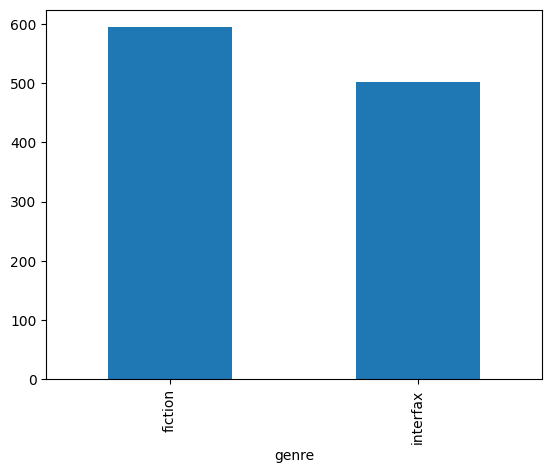

In [2]:
import import_ipynb
import import_librares # ноутбук с импортом библиотек
import func # ноутбук с функциями
import rus_ds_data # ноутбук с загрузкой и предварительной обрабткой русского датасета
from ipynb.fs.full.func import tokenize_morphy, tokenize_lancaster, tokenize_snowball
from sklearn.metrics import accuracy_score

In [3]:
from import_librares import CountVectorizer, TfidfVectorizer, pd, np, plt, train_test_split\
,LogisticRegression, classification_report, roc_auc_score, MaxAbsScaler, GridSearchCV\
,cross_val_score, ppb, Word2Vec

In [4]:
from rus_ds_data import\
    df, Y, df_morphy, df_snowball, df_lancaster\
    , X1, X2, X3, batch1, batch2, batch3

Обучение

In [12]:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [13]:
tokenized = batch2['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


In [14]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [15]:
np.array(padded).shape

(1096, 621)

In [16]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(1096, 621)

In [17]:
import torch
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

RuntimeError: The expanded size of the tensor (621) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1096, 621].  Tensor sizes: [1, 512]

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch2['genre']

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)
test_pred = lr_clf.predict(test_features)
train_pred = lr_clf.predict(train_features)

In [ ]:
accuracy_score(train_labels, train_pred), accuracy_score(test_labels, test_pred)

In [ ]:
print(classification_report(test_labels, test_pred))